## LINEAR REGRESSION

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio
%matplotlib inline

In [160]:
data = scio.loadmat('HW1_Data/dataset1')

In [161]:
X_train = data['X_trn']
y_train = data['Y_trn']
X_test = data['X_tst']
y_test = data['Y_tst']

In [162]:
X_train_2 = np.matrix(transform(X_train, 2))
X_train_3 = np.matrix(transform(X_train, 3))
X_train_5 = np.matrix(transform(X_train, 5))

X_test_2 = np.matrix(transform(X_test, 2))
X_test_3 = np.matrix(transform(X_test, 3))
X_test_5 = np.matrix(transform(X_test, 5))

In [163]:
y_train = np.matrix(y_train)
y_test = np.matrix(y_test)

theta0_2 = np.matrix(np.zeros(3))
theta0_3 = np.matrix(np.zeros(4))
theta0_5 = np.matrix(np.zeros(6))

alpha = 0.01
batchSize = 15
threshold = 0.0001

In [164]:
def MSE(y, y_pred):
    y = np.asarray(y)
    y_pred = np.asarray(y_pred)
    return np.mean((y - y_pred) ** 2)

In [165]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [166]:
def closedFormEquation(X, y):
    return (X.T * X).I * (X.T * y) 

In [167]:
def transform(X, degree):
    Z = A = X
    for i in range(degree-1):
        Z = Z * A
        X = np.insert(X, [i+1], Z, axis=1)
    return np.insert(X, 0, 1, axis=1)
    

In [168]:
def stochasticGradientDescent(X, y, theta, alpha, minibatch_size, threshold):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    cost = [np.inf]
    i = 1

    while True:
        for k in range(len(X) // minibatch_size):
            index_list = np.random.choice(len(X), size=minibatch_size, replace=False)
            X_batch = X[index_list]
            y_batch = y[index_list]
            error = (X_batch * theta.T) - y_batch
            
            for j in range(parameters):
                term = np.multiply(error, X_batch[:,j])
                temp[0,j] = theta[0,j] - ((alpha / len(X_batch)) * np.sum(term))

            theta = temp
            
        cost.append(computeCost(X, y, theta))
        if cost[-2] - cost[-1] < threshold and cost[-2] - cost[-1] > 0:
            break
            
#         if i % 50 == 0:
#             print("Loss iter",i,": ",cost[-1])
#         i += 1
        
        
    return theta, cost

## For degree 2

In [169]:
print("For degree 2")
theta_2_closed_form = closedFormEquation(X_train_2, y_train)
theta_2_gd, cost_2_gd = stochasticGradientDescent(X_train_2, y_train, theta0_2, 0.01, batchSize, threshold)
print("theta closed form", theta_2_closed_form.T)
print("theta gradient descent", theta_2_gd)
print("-------TRAINING SET-------")
print("cost closed form", computeCost(X_train_2, y_train, theta_2_closed_form.T))
print("cost gradient descent", cost_2_gd[-1])
print("MSE closed form", MSE(y_train, (X_train_2 * theta_2_closed_form)))
print("MSE train gradient descent", MSE(y_train, (X_train_2 * theta_2_gd.T)))
print("-------TEST SET-------")
print("MSE closed form", MSE(y_test, (X_test_2 * theta_2_closed_form)))
print("MSE test gradient descent", MSE(y_test, (X_test_2 * theta_2_gd.T)))

For degree 2
theta closed form [[ 9.49203678  4.79191663  1.52906587]]
theta gradient descent [[ 9.32572393  4.68697103  1.56493099]]
-------TRAINING SET-------
cost closed form 12.3709598182
cost gradient descent 12.4148142684
MSE closed form 24.7419196363
MSE train gradient descent 24.8296285368
-------TEST SET-------
MSE closed form 4413.5867675
MSE test gradient descent 4542.55087502


## For degree 3

In [170]:
print("For degree 3")
theta_3_closed_form = closedFormEquation(X_train_3, y_train)
theta_3_gd, cost_3_gd = stochasticGradientDescent(X_train_3, y_train, theta0_3, 0.0001, batchSize, threshold)
print("theta closed form", theta_3_closed_form.T)
print("theta gradient descent", theta_3_gd)
print("-------TRAINING SET-------")
print("cost closed form", computeCost(X_train_3, y_train, theta_3_closed_form.T))
print("cost gradient descent", cost_3_gd[-1])
print("MSE closed form", MSE(y_train, (X_train_3 * theta_3_closed_form)))
print("MSE train gradient descent", MSE(y_train, (X_train_3 * theta_3_gd.T)))
print("-------TEST SET-------")
print("MSE closed form", MSE(y_test, (X_test_3 * theta_3_closed_form)))
print("MSE test gradient descent", MSE(y_test, (X_test_3 * theta_3_gd.T)))

For degree 3
theta closed form [[ 10.00815033   0.20418927   1.47413164   0.47320168]]
theta gradient descent [[ 2.5472508   0.31539258  2.25750535  0.47246978]]
-------TRAINING SET-------
cost closed form 1.98393157851
cost gradient descent 14.1567164474
MSE closed form 3.96786315703
MSE train gradient descent 28.3134328948
-------TEST SET-------
MSE closed form 53.8311491635
MSE test gradient descent 370.56474761


## For degree 5


In [171]:
print("For degree 5")
theta_5_closed_form = closedFormEquation(X_train_5, y_train)
theta_5_gd, cost_5_gd = stochasticGradientDescent(X_train_5, y_train, theta0_5, 0.00001, batchSize, threshold)
print("theta closed form", theta_5_closed_form.T)
print("theta gradient descent", theta_5_gd)
print("-------TRAINING SET-------")
print("cost closed form", computeCost(X_train_5, y_train, theta_5_closed_form.T))
print("cost gradient descent", cost_5_gd[-1])
print("MSE closed form", MSE(y_train, (X_train_5 * theta_5_closed_form)))
print("MSE train gradient descent", MSE(y_train, (X_train_5 * theta_5_gd.T)))
print("-------TEST SET-------")
print("MSE closed form", MSE(y_test, (X_test_5 * theta_5_closed_form)))
print("MSE test gradient descent", MSE(y_test, (X_test_5 * theta_5_gd.T)))

For degree 5
theta closed form [[  9.84545670e+00   2.03644970e-01   1.57564738e+00   4.75176601e-01
   -7.40094164e-03  -1.77139419e-04]]
theta gradient descent [[  1.87108282e+00   2.82123497e-01   3.21011686e+00   4.69203334e-01
   -8.61452081e-02   1.45093208e-03]]
-------TRAINING SET-------
cost closed form 1.97344053614
cost gradient descent 12.0353401917
MSE closed form 3.94688107228
MSE train gradient descent 24.0706803834
-------TEST SET-------
MSE closed form 41.5094372635
MSE test gradient descent 5055.69909239


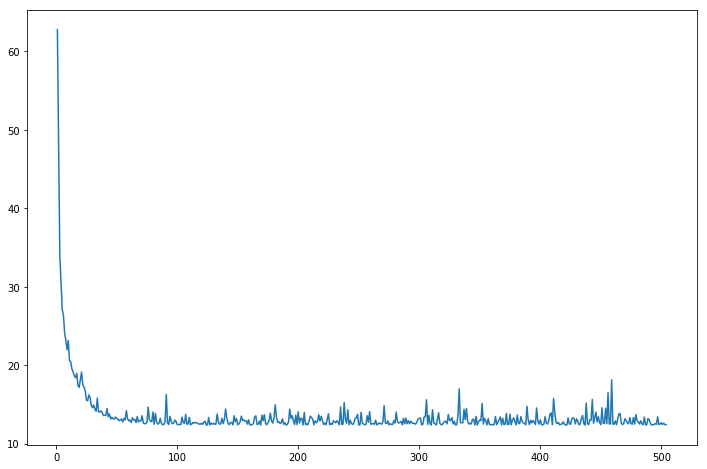

In [172]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(len(cost_2_gd)), cost_2_gd)

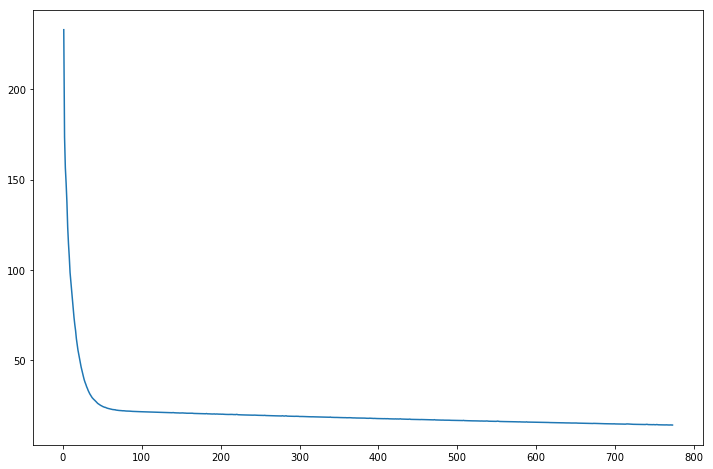

In [173]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(len(cost_3_gd)), cost_3_gd)

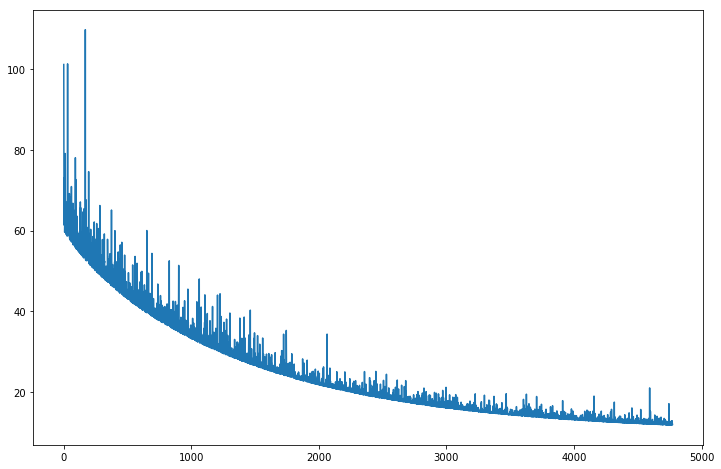

In [174]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(len(cost_5_gd)), cost_5_gd)

In [175]:
def plotPrediction(y, y_pred, title = 'train set'):
    plt.scatter(y, y_pred)
    plt.plot([min(y), max(y)], [min(y), max(y)], '--')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.title(title)

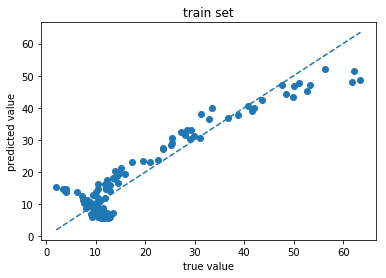

In [176]:
plotPrediction(np.asarray(y_train), np.asarray(X_train_2 * theta_2_gd.T))

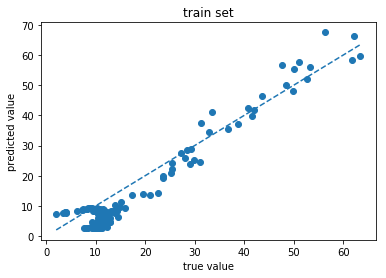

In [177]:
plotPrediction(np.asarray(y_train), np.asarray(X_train_3 * theta_3_gd.T))

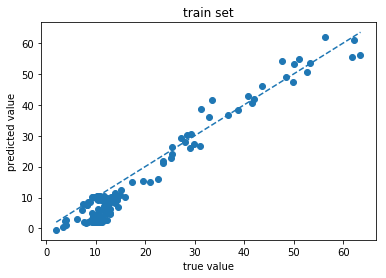

In [178]:
plotPrediction(np.asarray(y_train), np.asarray(X_train_5 * theta_5_gd.T))

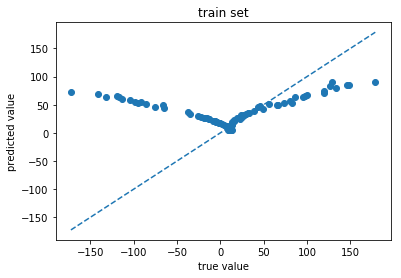

In [179]:
plotPrediction(np.asarray(y_test), np.asarray(X_test_2 * theta_2_gd.T))

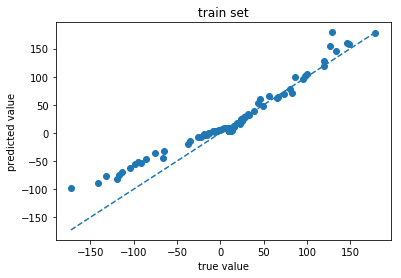

In [180]:
plotPrediction(np.asarray(y_test), np.asarray(X_test_3 * theta_3_gd.T))

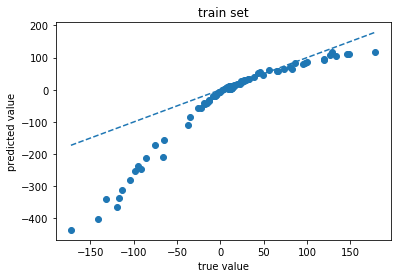

In [181]:
plotPrediction(np.asarray(y_test), np.asarray(X_test_5 * theta_5_gd.T))

In [128]:
# def batchGradientDescent(X, y, theta, alpha):
#     temp = np.matrix(np.zeros(theta.shape))
#     parameters = theta.ravel().shape[1]
#     cost = [np.inf]
#     i = 1

#     while True:
#         error = (X * theta.T) - y
        
#         for j in range(parameters):
#             term = np.multiply(error, X[:,j])
#             temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
#         theta = temp
#         cost.append(computeCost(X, y, theta))
        
#         if cost[-2] - cost[-1] < 0.0001 and cost[-2] - cost[-1] > 0:
#             break
        
#         if i % 50 == 0:
#             print("Loss iter",i,": ",cost[-1])
#         i += 1
        
#     return theta, cost